In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import requests
import urllib3

## Log scales with Numpy

En el siguiente ejemplo, compararemos la frecuencia de palabras en dos fragmentos: uno del Martín Fierro y uno de Don Quijote de la Mancha. Primero leeremos los textos y obtendremos las palabras más frecuentes, junto con su número de ocurrencias, para ambas obras.

In [34]:
martin_fierro_url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/martin_fierro.txt'
quijote_url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/quijote.txt'
def get_frequent_words(target_url):
    words = []
    http = urllib3.PoolManager()
    for line in urllib3.PoolManager().request('GET', target_url).data.decode('utf-8').split():
        if len(line) > 2:
            words.extend(line.split())
    unique_words, counts = numpy.unique(words, return_counts=True)
    sorted_counts = numpy.argsort(counts * -1)
    most_frequent_words = [unique_words[i] for i in sorted_counts]
    most_frequent_counts = counts[sorted_counts]
    return most_frequent_words, most_frequent_counts

words_m, counts_m = get_frequent_words(martin_fierro_url)
words_q, counts_q = get_frequent_words(quijote_url)

/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [35]:
[x for x in zip(words_m, counts_m)][:10]

[('que', 211),
 ('los', 86),
 ('las', 64),
 ('con', 63),
 ('como', 46),
 ('una', 41),
 ('más', 34),
 ('por', 33),
 ('era', 30),
 ('sin', 27)]

In [36]:
[x for x in zip(words_q, counts_q)][:10]

[('que', 84),
 ('con', 26),
 ('los', 21),
 ('por', 18),
 ('del', 17),
 ('había', 14),
 ('era', 14),
 ('como', 13),
 ('nombre', 12),
 ('más', 11)]

Sabemos que la distribución de palabras en lenguaje natural sigue una distribución exponencial (Ley de Zipf), al igual que la mayoría de los fenómenos humanos. Si graficamos la distribución de las frecuencias, obtenemos un gráfico que no nos permite comparar fácilmente los valores más pequeños.

Text(0.5,1,'Distribution of word frequency in Don Quijote de la Mancha')

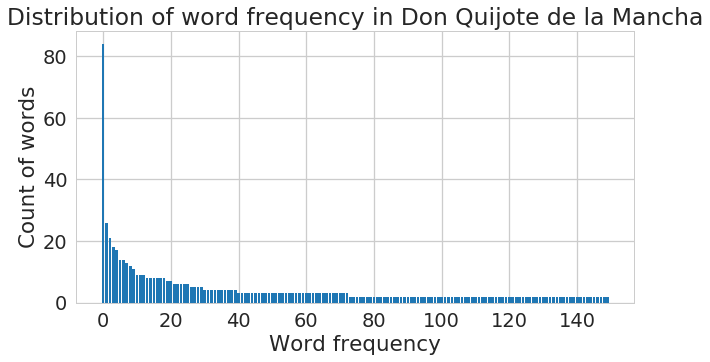

In [37]:
plt.figure(figsize=(10,5))
plt.bar(numpy.arange(150), counts_q[:150])
plt.xlabel('Word frequency')
plt.ylabel('Count of words')
plt.title('Distribution of word frequency in Don Quijote de la Mancha')

Para solucionar este problema, podemos usar una escala logarítmica en el eje de las y, en lugar de una lineal. En el siguiente ejemplo vemos como se programa un gráfico de barras dobre con **matplotlib** y cómo le agregamos la escala logarítmica.

Text(0,0.5,'Frequency')

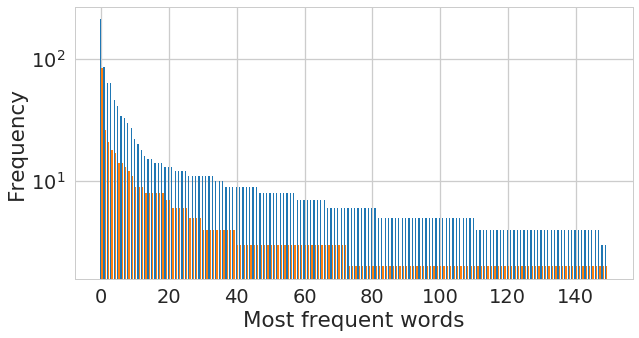

In [38]:
import matplotlib.pyplot as plt
import numpy as np

data = [_ for _ in zip(counts_m, counts_q)][:150]
dimw = 0.75 / len(data[0])  # Width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x + (i * dimw) - dimw / 2, y, dimw)

ax.set_yscale('log')
ax.set_xlabel('Most frequent words')
ax.set_ylabel('Frequency')

----
## Múltiples variables con Seaborn

Credits to https://gist.github.com/mwaskom/8224591

En la siguiente sección vamos a ver un ejemplo para graficar la distribución de una dataset incluyendo tantas variables como sea posible. El dataset del titanic es muy conocido para data science y machine learning, encontrarán muchas descripciones y ejemplos.

In [39]:
import pandas
import seaborn

In [40]:
seaborn.set_style('whitegrid')
seaborn.set_context('talk', font_scale=1.5)

In [41]:
titanic = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/titanic_train.csv')
titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


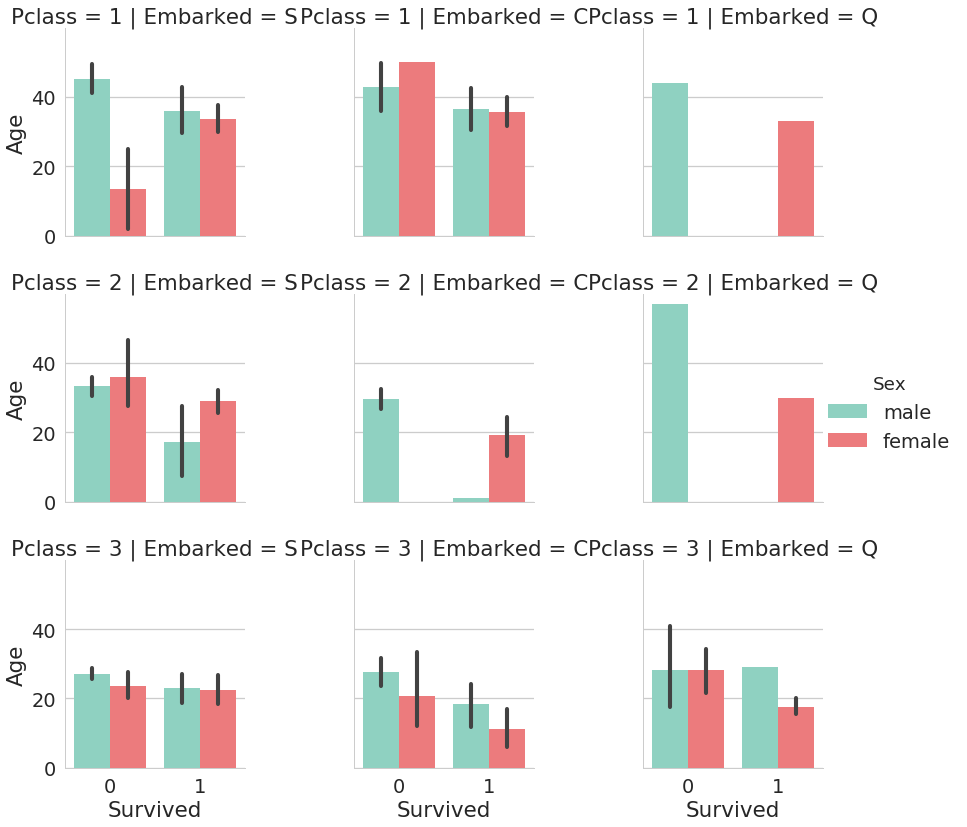

In [42]:
palette ={'female':'#FF686B', 'male':'#84DCC6'}
seaborn.factorplot(
    'Survived', 'Age', data=titanic, hue='Sex',
    row='Pclass', col='Embarked', kind='bar',
    palette=palette)
seaborn.despine()

---

# Titanic plots with R

En las siguientes celdas veremos como utilizar gráficos de R en una notebook de python. Las instrucciones de instalación están en el archivo README.md

In [18]:
import rpy2
%load_ext rpy2.ipython

El %% indica un magic, esto quiere decir una instrucción sobre la ejecución del código. En este caso, indica que se debe utilizar el kernel de R.

Debemos importar también las librerías de R. 

In [19]:
%%R

library(ggplot2)
library(reshape2)

Pueden encontrar un tutorial completo de ggPlot en https://github.com/crscardellino/MeetupDSCba2017/blob/master/python_with_ggplot.ipynb

Leemos la variable de python donde hemos guardado el dataset con -i

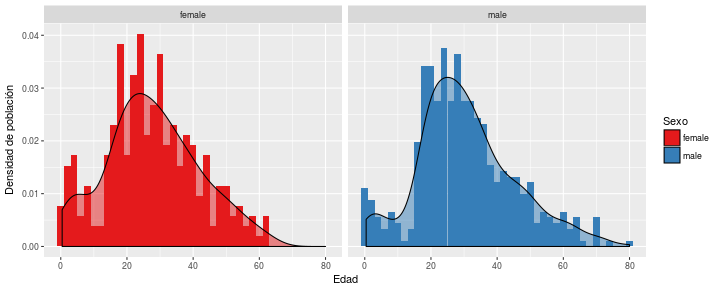

In [20]:
%%R -i titanic -w 10 -h 4 -u in

ggplot(titanic, aes(x=Age, fill=Sex)) + 
 geom_histogram(binwidth=2, aes(y = ..density..)) +
 geom_density(alpha=0.5) + labs(x='Edad', y='Densidad de población')+ 
 facet_wrap(~Sex) + scale_fill_brewer(palette='Set1', name='Sexo')

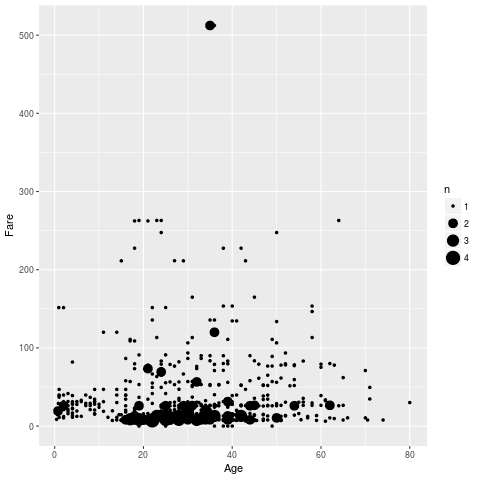

In [21]:
%%R -i titanic

ggplot(titanic, aes(x=Age, y=Fare)) + geom_count()

/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: `stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


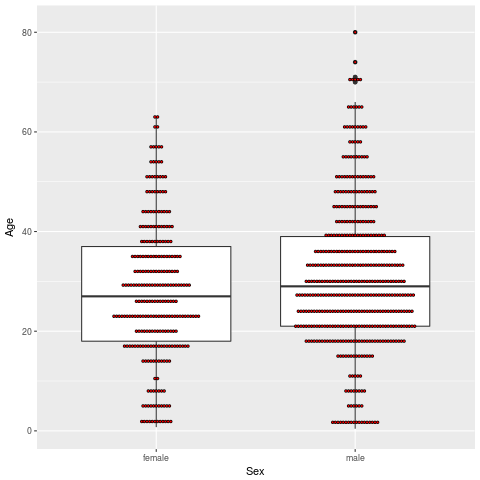

In [22]:
%%R -i titanic

ggplot(titanic, aes(x=Sex, y=Age)) + geom_boxplot() + geom_dotplot(binaxis='y', 
    stackdir='center', 
    dotsize = .2, 
    fill="red")

---

## Instalando librerías en R

En esta sección utilizaresmos una librería nueva para R, llamada ggparallel. Utilizaremos ggparallel para generar diagramas Sankey.

Se pueden instalar nuevas librerías directamente desde la notebook con un comando como el siguiente:

In [28]:
%%R

install.packages("ggparallel")

/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpgFNcke/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Updating HTML index of packages in '.Library'

  warnings.warn(x, RRuntimeWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Making 'packages.html' ...
  warnings.warn(x, RRuntimeWarning)
/home/milagro/miniconda3/envs/edm_env/lib/python3.5/site-packages/rpy2/rinterface/__in

In [29]:
%%R

library(ggparallel)

En este caso, en lugar de utilizar el dataset del Titanic que ya habíamos leído con pandas, usaremos el que viene dado con la distribución de R. Al igual que pandas, R almacena los datos en dataframes con funciones y accesores muy similares.

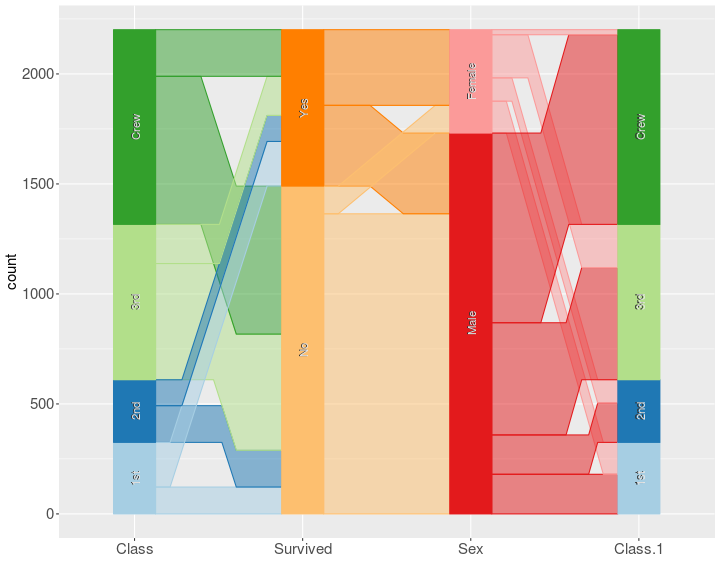

In [30]:
%%R -w 10 -h 8 -u in

data(Titanic)
titanic <- as.data.frame(Titanic)

ggparallel(names(titanic)[c(1,4,2,1)], order=0, titanic, weight="Freq") +
  scale_fill_brewer(palette="Paired", guide="none") +
  scale_colour_brewer(palette="Paired", guide="none") +
  theme(text=element_text(size=15), axis.text=element_text(size=15))

---

# Conflictos mundiales

En esta sección analizaremos un nuevo dataset sobre conflictos mundiales. Combinaremos dos dataset: uno descripto en [este documento](http://www.pcr.uu.se/digitalAssets/63/a_63324-f_Codebook_UCDP_PRIO_Armed_Conflict_Dataset_v4_2011.pdf) con un reporte de los conflicto nacionales e internaciones, y otro con un listado de países actuales y sus continentes.

Nota: las claves de region tiene el siguiente significado
1 Europe,
2 Middle east,
3 Asia,
4 Africa,
5 Americas

In [43]:
import pandas

In [44]:
countries = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/Countries-Continents.csv')
conflicts = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/armed_conflicts.csv')

Imprimimos muestras de ambos datasets

In [45]:
conflicts[:5]

,ID,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incomp,Terr,YEAR,...,EpEnd,EpEndDate,EpEndPrec,GWNOA,GWNOA2nd,GWNOB,GWNOB2nd,GWNOLoc,Region,Version
0,1,Bolivia,Bolivia,NaN,Popular Revolutionary Movement,1580,NaN,2,NaN,1946,...,1,1946-07-21,1.0,145,NaN,NaN,NaN,145,5,4-2011
1,1,Bolivia,Bolivia,NaN,MNR,1581,NaN,2,NaN,1952,...,1,1952-04-12,1.0,145,NaN,NaN,NaN,145,5,4-2011
2,1,Bolivia,Bolivia,NaN,ELN,1582,NaN,2,NaN,1967,...,1,1967-10-16,1.0,145,NaN,NaN,NaN,145,5,4-2011
3,2,Cambodia,France,NaN,Khmer Issarak,1001,NaN,1,Cambodia,1946,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,4-2011
4,2,Cambodia,France,NaN,Khmer Issarak,1001,NaN,1,Cambodia,1947,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,4-2011


In [46]:
countries[:5]

,Continent,Country,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,Africa,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Botswana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,Burkina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Combinamos la información tomando como clave el nombre del país y agregando el nombre del continente correspondiente. Notar que estamos filtrando todas las filas donde SideA o SideB no estén listados como países actuales.

In [47]:
country_conflicts = conflicts[conflicts.SideB.isin(countries.Country)][
    ['SideA', 'SideB', 'Location', 'Terr', 'Region', 'YEAR']]
country_conflicts = country_conflicts.merge(
    countries[['Continent', 'Country']].rename(columns={'Continent': 'ContinentA'}),
    left_on=['SideA'], right_on=['Country']).merge(
    countries[['Continent', 'Country']].rename(columns={'Continent': 'ContinentB'}),
    left_on=['SideB'], right_on=['Country'])#.drop(columns=['Country_x', 'Country_y'])

In [48]:
country_conflicts[:3]

,SideA,SideB,Location,Terr,Region,YEAR,ContinentA,Country_x,ContinentB,Country_y
0,Thailand,France,"France, Thailand",Northern Cambodia,3,1946,Asia,Thailand,Europe,France
1,Tunisia,France,"France, Tunisia",Bizerte,4,1961,Africa,Tunisia,Europe,France
2,United Kingdom,Albania,"Albania, United Kingdom",Korfu Channel,1,1946,Europe,United Kingdom,Europe,Albania


Generamos el diagrama de Sankey. Definimos los colores manualmente para que se repitan en ambos lados

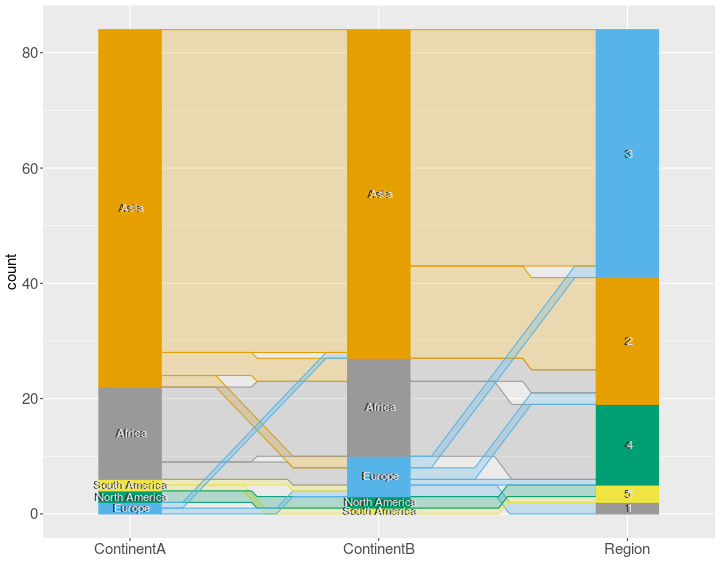

In [49]:
%%R -i country_conflicts -w 10 -h 8 -u in

colors <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442")
ggparallel(list("ContinentA", "ContinentB", "Region"),
           data=country_conflicts, text.angle=0, alpha=0.25) +
    theme(legend.position="none") +
    scale_fill_manual(values = rep(colors, 14)) + 
    scale_colour_manual(values = rep(colors, 14)) +
    theme(text=element_text(size=15), axis.text=element_text(size=15))

Nota: En las filminas pueden encontrar más información sobre los errores que tiene este gráfico, incluyendo el preproceso de datos.

En lugar de un diagrama Sankey, un heatmap o diagrama de calor también muestra la misma información.

Para crear un heatmap utilizando seaborn, necesitamos los datos como una matriz. Por suerte, pandas viene con una función que nos simplica este cálculo.

In [50]:
continent_joint_freq = pandas.crosstab(
    index=country_conflicts["ContinentA"], columns=country_conflicts["ContinentB"])
continent_joint_freq

ContinentB,Africa,Asia,Europe,North America,South America
ContinentA,,,,,
Africa,13,0,3,0,0
Asia,4,56,2,0,0
Europe,0,1,1,0,0
North America,0,0,0,2,0
South America,0,0,1,0,1


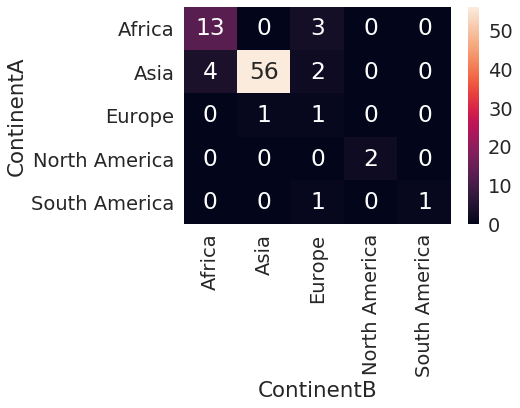

In [51]:
seaborn.heatmap(continent_joint_freq, annot=True)

En ggplot, por otra parte, la matriz debe tener solamente 3 columnas. Cada fila es una tripla (valor del eje x, valor del eje y, valor de la celda x,y)

In [52]:
continent_joint_freq = country_conflicts[["ContinentA", "ContinentB", "Region"]].groupby(
    ["ContinentA", "ContinentB"]).count().reset_index().rename(columns={'Region': 'Count'})

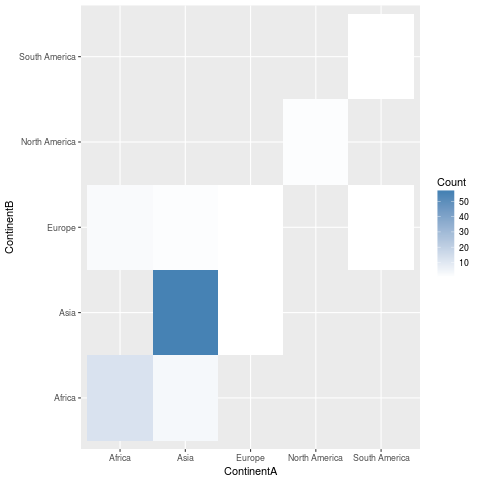

In [53]:
%%R -i continent_joint_freq
ggplot(data = continent_joint_freq, aes(x=ContinentA, y=ContinentB, fill=Count)) + 
  geom_tile() + scale_fill_gradient(low = "white", high = "steelblue")

Puede haber muchos problemas con el dataset, comenzando por el filtrado de paises. Plotearemos ahora la cantidad de conflictos por pais, con respecto a la zona donde se desarrollaron.

La principal desventaja de este método es que, al haber tantos países, debemos limitarnos y mostrar sólo un subconjunto. En este caso, sólo aquellos que tengan más de 10 conflictos.

In [54]:
conflicts_region = conflicts[["SideA", "SideB", "Region"]].groupby(
    ["SideA", "Region"]).count().reset_index().rename(columns={'SideB': 'Count'})
conflicts_region = conflicts_region[conflicts_region.Count > 10]

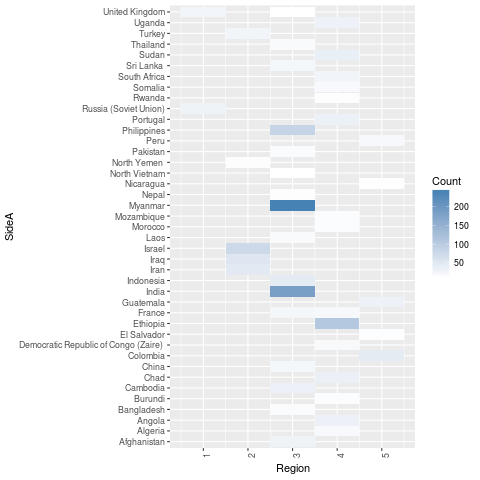

In [55]:
%%R -i conflicts_region
ggplot(data = conflicts_region, aes(x=Region, y=SideA, fill=Count)) + 
  geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

---

# Visualizaciones con D3

Solamente vamos a dejar los datos procesados para poder leerlos desde el javascript

Es recomendable luego checkear los nombres de los paises, ya que el archivo que usaremos como origen de las coordenadas no tiene los mismos nombres. Por ej: United States vs United States of America.

In [56]:
conflicts.SideA.value_counts().to_json('countries_conflicts.json')